<a href="https://colab.research.google.com/github/Muntasir2179/pytorch-learnig/blob/pytorch-workflow/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

# Data (preparing and loading)

Data can be anything in machine learning.

* Exce spreadsheet.
* Image of any kind.
* Videos.
* Audio.
* DNA.
* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We will use a linear regression formula to make straight line with *known* **Parameter**.

In [2]:
# creating known parameter
weight = 0.7
bias = 0.3

# create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

# Spliting data into train and test set

In [4]:
train_split = int(0.8 * len(X))
train_split

40

In [5]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data and test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  # are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
  plt.legend(prop={"size": 14})

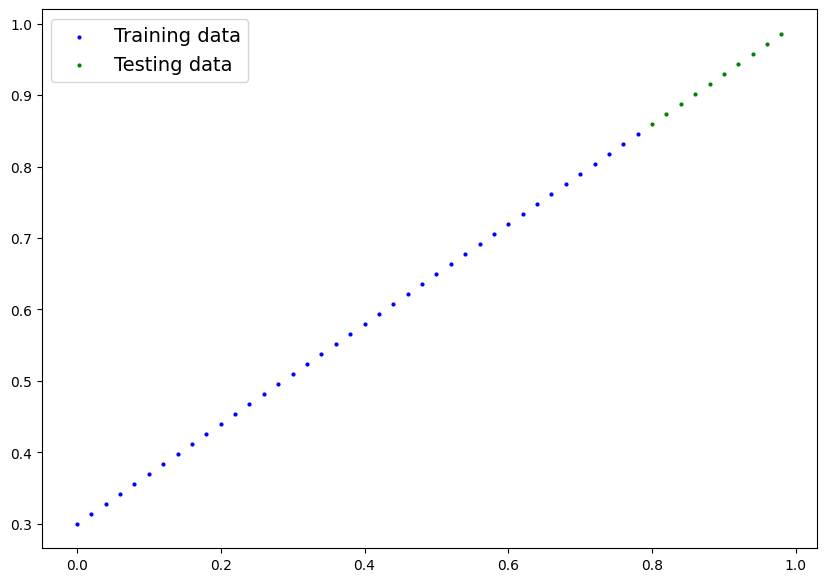

In [7]:
plot_predictions()

# Building a model to train on the dataset

* torch.nn -> Containes all of the buildings for computational graphs (a neural network can be considered a computational graph).

* torch.nn.Parameter -> What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.

* torch.nn.Module -> The base class for all neural network modules, if you subclass it, you should overwrite forward() method.

* torch.optim -> This is where the optimizers in PyTorch live, they will help with gradient descent.

* forward() -> All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

In [8]:
# creating a Linear Regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # requires_grad=True -> for updating this parameter by Gradient Descent
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [9]:
torch.manual_seed(42)

# creating an instance of the model
model_0 = LinearRegressionModel()

# checkout the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making prediction using torch.inference_mode()

To check our model's predictive prower, let's see how well it predicts y_test based on x_test.

When we pass data through our model, it's going to run it through the forward() method.

In [11]:
# make predictions with model
# inference mode disables all the useful things that are available during training
# another way to do the same thing is to use torch.no_grad()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

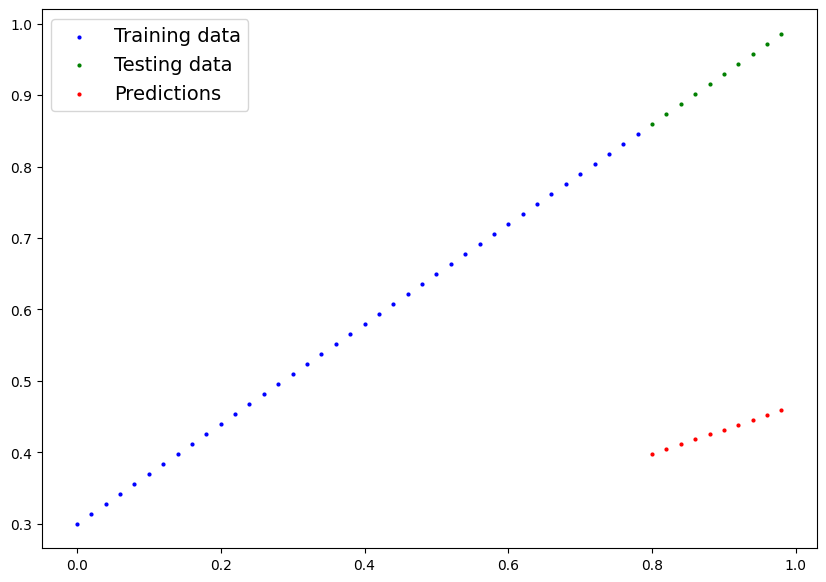

In [12]:
plot_predictions(predictions=y_preds)

# Training our model

Things we need for training:

* **Loss function:** A function to measure how wrong your model's predictions are to the real outputs, lower is better.

* **Optimizer:** Takes into account the loss of the model and adjust the model's parameter (e.g. weights and biases).

And specifically in PyTorch we need:

* A training loop.
* A testing loop.

In [13]:
# setting up a loss function
loss_function = nn.L1Loss()

# setting up a optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

## Building a training and testing loop

0. Loop through the data.
1. Forward pass (This involves data moving through our model;'s `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels).
3. Optimizer zero grad.
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss.
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss.

In [14]:
epochs = 200

# track different values
epoch_count = []
training_loss_values = []
test_loss_values = []

# training loop
# 0. loop through the data
for epoch in range(1 , epochs + 1):
  # set the model to training mode
  # train mode in PyTorch sets all parameters that require gradients to require gradients
  model_0.train()

  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. calculate the training loss (nn.L1Loss())
  training_loss = loss_function(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss with respect to the parameters of the model
  training_loss.backward()

  # 5. step the optimizer (perform gradient descent)
  optimizer.step()

  # truns off different settings in the model not needed for evaluation/testing (dropout/ batch-normalization)
  model_0.eval()
  with torch.inference_mode():  # turns off gradient tracking
    # do the forward pass
    test_pred = model_0(X_test)

    # calculate the test loss
    test_loss = loss_function(test_pred, y_test)

  # printing whats happning
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    training_loss_values.append(training_loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch}/{epochs} | Training Loss: {training_loss: 0.4f} | Test Loss: {test_loss: 0.4f}")
    # print(model_0.state_dict())
    print()

Epoch: 10/200 | Training Loss:  0.2092 | Test Loss:  0.3598

Epoch: 20/200 | Training Loss:  0.0968 | Test Loss:  0.2282

Epoch: 30/200 | Training Loss:  0.0546 | Test Loss:  0.1497

Epoch: 40/200 | Training Loss:  0.0459 | Test Loss:  0.1154

Epoch: 50/200 | Training Loss:  0.0420 | Test Loss:  0.1003

Epoch: 60/200 | Training Loss:  0.0385 | Test Loss:  0.0893

Epoch: 70/200 | Training Loss:  0.0351 | Test Loss:  0.0810

Epoch: 80/200 | Training Loss:  0.0317 | Test Loss:  0.0734

Epoch: 90/200 | Training Loss:  0.0282 | Test Loss:  0.0652

Epoch: 100/200 | Training Loss:  0.0248 | Test Loss:  0.0569

Epoch: 110/200 | Training Loss:  0.0214 | Test Loss:  0.0493

Epoch: 120/200 | Training Loss:  0.0179 | Test Loss:  0.0410

Epoch: 130/200 | Training Loss:  0.0145 | Test Loss:  0.0334

Epoch: 140/200 | Training Loss:  0.0111 | Test Loss:  0.0252

Epoch: 150/200 | Training Loss:  0.0076 | Test Loss:  0.0169

Epoch: 160/200 | Training Loss:  0.0042 | Test Loss:  0.0093

Epoch: 170/200 | 

## Plotting training curve

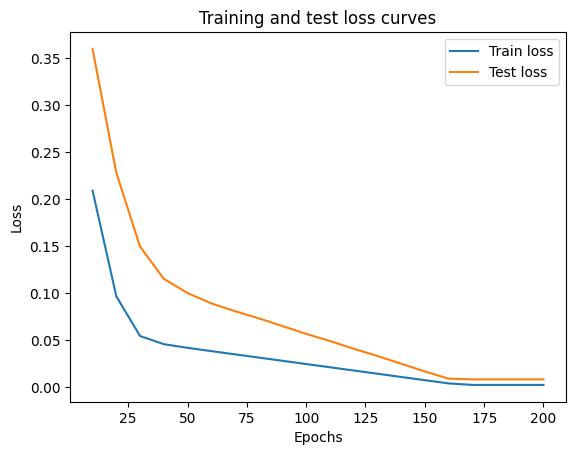

In [15]:
# plot the loss curves
plt.plot(epoch_count, torch.tensor(training_loss_values).numpy(), label='Train loss')
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel('Loss')
plt.xlabel("Epochs")
plt.legend()
plt.show()

## Making predictions with our trained model

In [16]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [17]:
print(model_0.state_dict())
print(f"Ideal weight: {weight} and Ideal bias: {bias}")

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Ideal weight: 0.7 and Ideal bias: 0.3


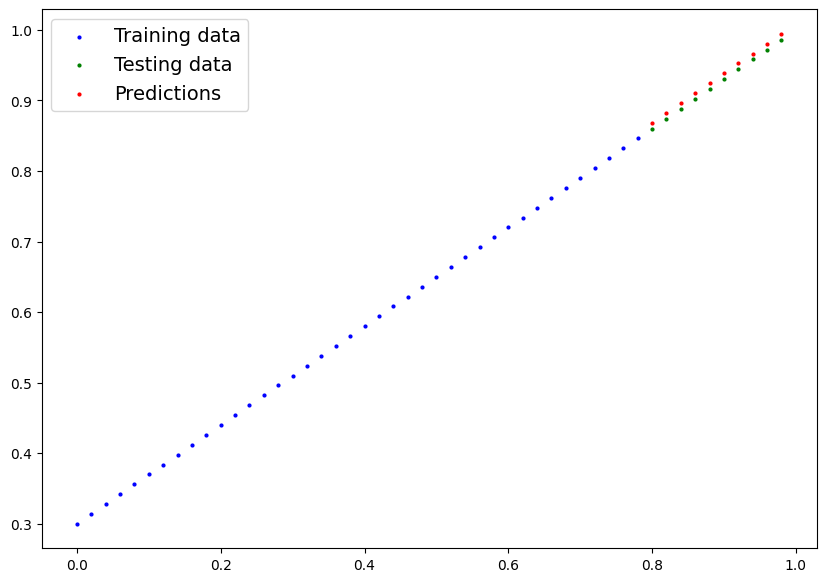

In [18]:
plot_predictions(predictions=y_preds_new)

# Saving a model in PyTorch

1. `torch.save()` - allows us to save a PyTorch object in Python's pickle format.
2. `torch.load()` - allows us to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dic()` - this allows to load a model's saved state dictionary.

In [20]:
from pathlib import Path

# create a models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [21]:
!ls -1 models

01_pytorch_workflow_model_0.pth


In [22]:
# loading back the saved model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_0.eval()

LinearRegressionModel()

In [23]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
# making some predictions with the loaded model
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting all the steps together that we have learned so far

In [28]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

In [31]:
# device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [32]:
!nvidia-smi

Mon Sep 18 06:41:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Creating some data

In [35]:
# creating some data using the linear regresison formula of y = weight*X + bias
weight = 0.7
bias = 0.3

# create range values
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [36]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
# spliting the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

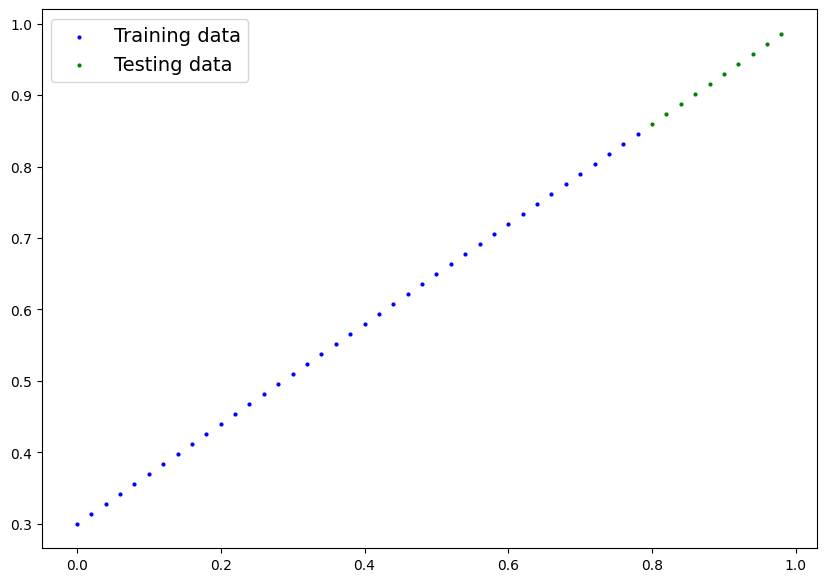

In [38]:
# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## Building a model class

In [42]:
class LinReg(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [50]:
torch.manual_seed(42)
# initializing the mode
model = LinReg()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [51]:
# check the model current device
next(model.parameters()).device

device(type='cpu')

In [52]:
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

## Training and testing loop

In [53]:
# setup loss function
loss_fn = nn.L1Loss()

# setup optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [54]:
torch.manual_seed(42)
# setting hyperparameter
epochs = 200

# putting our data into the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# for saving training result
epoch_count_trace = []
train_loss_trace = []
test_loss_trace = []

# training loop
for epoch in range(1, epochs + 1):
  # setting training mode
  model.train()

  # forward pass
  y_preds = model(X_train)

  # training loss
  loss = loss_fn(y_preds, y_train)

  # backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # turning off settings that are required for training
  model.eval()
  with torch.inference_mode():
    test_preds = model(X_test)
    test_loss = loss_function(test_preds, y_test)

  if epoch % 10 == 0:
    epoch_count_trace.append(epoch)
    train_loss_trace.append(loss)
    test_loss_trace.append(test_loss)
    print(f"Epoch: {epoch} | {epochs} || Training loss - {loss: 0.4f} || Test loss - {test_loss: 0.4f}")
    print()

Epoch: 10 | 200 || Training loss -  0.4515 || Test loss -  0.4527

Epoch: 20 | 200 || Training loss -  0.3363 || Test loss -  0.3180

Epoch: 30 | 200 || Training loss -  0.2211 || Test loss -  0.1833

Epoch: 40 | 200 || Training loss -  0.1059 || Test loss -  0.0486

Epoch: 50 | 200 || Training loss -  0.0247 || Test loss -  0.0469

Epoch: 60 | 200 || Training loss -  0.0203 || Test loss -  0.0469

Epoch: 70 | 200 || Training loss -  0.0169 || Test loss -  0.0386

Epoch: 80 | 200 || Training loss -  0.0134 || Test loss -  0.0304

Epoch: 90 | 200 || Training loss -  0.0100 || Test loss -  0.0228

Epoch: 100 | 200 || Training loss -  0.0066 || Test loss -  0.0145

Epoch: 110 | 200 || Training loss -  0.0031 || Test loss -  0.0062

Epoch: 120 | 200 || Training loss -  0.0103 || Test loss -  0.0003

Epoch: 130 | 200 || Training loss -  0.0103 || Test loss -  0.0003

Epoch: 140 | 200 || Training loss -  0.0103 || Test loss -  0.0003

Epoch: 150 | 200 || Training loss -  0.0103 || Test loss 

In [56]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

## Making some predictions with our trained model

In [63]:
model.eval()
with torch.inference_mode():
  y_preds_new = model(X_test)

In [58]:
loss_fn(y_preds_new, y_test)

tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>)

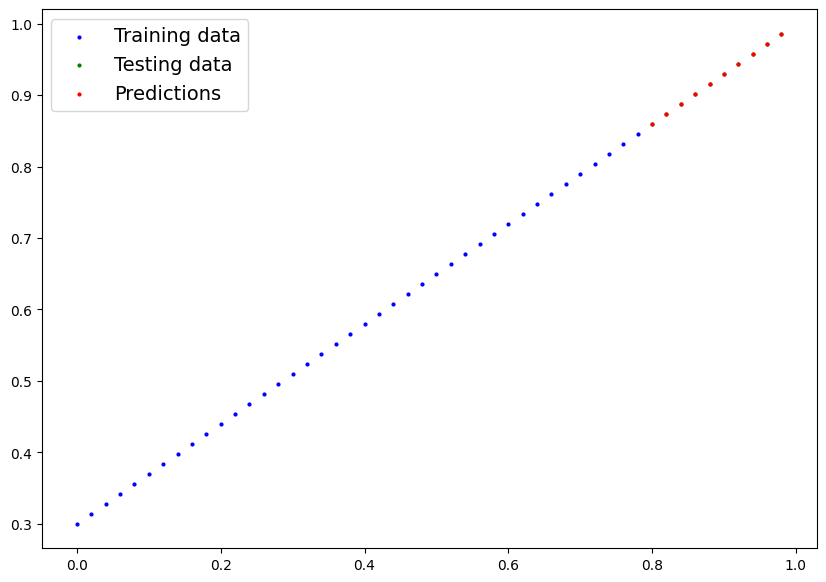

In [64]:
plot_predictions(predictions = y_preds_new.cpu())

## Plotting training curve

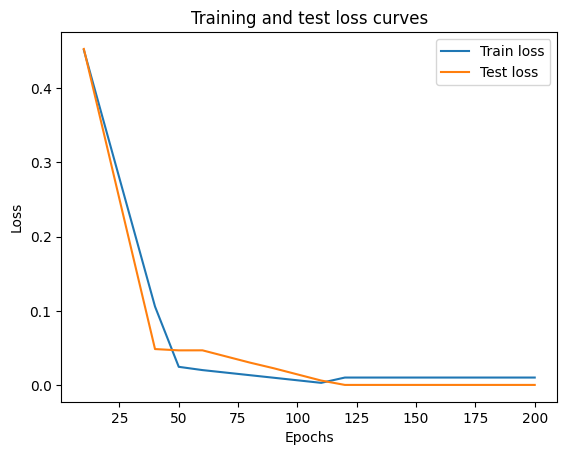

In [65]:
# plot the loss curves
plt.plot(epoch_count_trace, torch.tensor(train_loss_trace).numpy(), label='Train loss')
plt.plot(epoch_count_trace, torch.tensor(test_loss_trace).numpy(), label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel('Loss')
plt.xlabel("Epochs")
plt.legend()
plt.show()